In [42]:
import pandas as pd
import numpy as np
import seaborn as sns


In [43]:
movies_df = pd.read_csv("../resources/IMDb movies.csv")
terrorism_df = pd.read_csv("../resources/globalterrorism_converted.csv")


/home/lee/.cache/pypoetry/virtualenvs/movie-terrorism-pandas-t6Gt0Pkn-py3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (4,6,19,20,25,26,30,31,32,33,34,36,40,42,44,48,50,52,56,61,62,63,65,66,67,68,74,75,76,77,78,79,80,81,83,85,87,89,90,91,92,93,94,96,99,100,101,102,107,109,110,111,112,113,114,115,116,117,118,119,120,121,122,124,131,132,133,135,136,137) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [44]:
movies_df.tail(5)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
81268,tt9903716,Jessie,Jessie,2019,2019-03-15,"Horror, Thriller",106,India,Telugu,Aswani Kumar V.,...,"Sritha Chandana, Pavani Gangireddy, Abhinav Go...","Set in an abandoned house, the film follows a ...",7.2,219,NaN,NaN,NaN,NaN,21.0,NaN
81269,tt9905412,Ottam,Ottam,2019,2019-03-08,Drama,120,India,Malayalam,Zam,...,"Nandu Anand, Roshan Ullas, Manikandan R. Achar...","Set in Trivandrum, the story of Ottam unfolds ...",7.8,510,INR 4000000,NaN,$ 4791,NaN,NaN,NaN
81270,tt9905462,Pengalila,Pengalila,2019,2019-03-08,Drama,111,India,Malayalam,T.V. Chandran,...,"Lal, Akshara Kishor, Iniya, Narain, Renji Pani...",An unusual bond between a sixty year old Dalit...,8.4,604,INR 10000000,NaN,NaN,NaN,NaN,NaN
81271,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,...,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",NaN,8.4,369,NaN,NaN,NaN,NaN,NaN,NaN
81272,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,2019-03-15,"Drama, Family",98,Turkey,Turkish,Ahmet Faik Akinci,...,"Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...",NaN,7.2,190,NaN,NaN,$ 2833,NaN,NaN,NaN


In [45]:
terrorism_df.tail(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,-9,-9,1,1,NaN,NaN,NaN,NaN,NaN,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,-9,-9,0,-9,NaN,NaN,NaN,NaN,NaN,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,-9,-9,0,-9,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
terrorism_df['imonth'] = terrorism_df['imonth'].astype(str).apply(lambda x: x.zfill(2))
terrorism_df['iday'] = terrorism_df['iday'].astype(str).apply(lambda x: x.zfill(2))
terrorism_df["datetime"] = terrorism_df["iyear"].astype(str) + terrorism_df["imonth"].astype(str) + terrorism_df["iday"].astype(str)

In [47]:
terrorism_df['datetime']= pd.to_datetime(terrorism_df['datetime'], format="%Y%m%d", errors="ignore") 

Text(0, 0.5, 'Number of recorded Terrorist events worldwide')

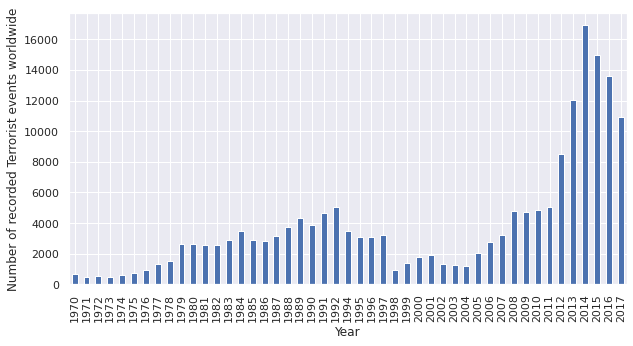

In [48]:
sns.set()
terror_events_per_year = terrorism_df["iyear"].value_counts().sort_index()
terror_events_per_year
ax = terror_events_per_year.plot.bar(figsize=(10,5))
ax.set_xlabel("Year")
ax.set_ylabel("Number of recorded Terrorist events worldwide")

In [49]:
movies_per_year = movies_df["year"][movies_df["year"] > 1969].value_counts().sort_index()

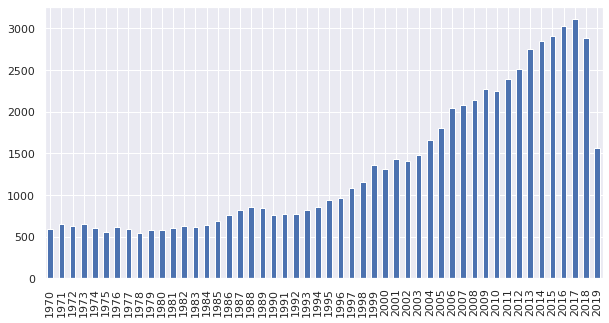

In [50]:
bx = movies_per_year.plot.bar(figsize=(10,5))

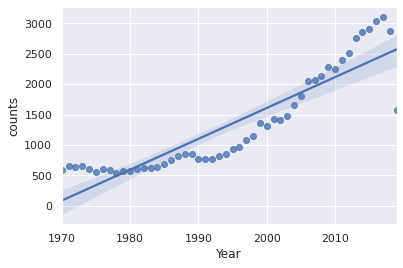

In [51]:
# x, y = pd.Series(movies_per_year[0], name="Year"), pd.Series(movies_per_year[1], name="Count")
movies_per_year_df = movies_df["year"][movies_df["year"] > 1969].value_counts().sort_index().rename_axis('Year').reset_index(name='counts')
movies_per_year_df
ax = sns.regplot(x="Year", y="counts", data=movies_per_year_df)


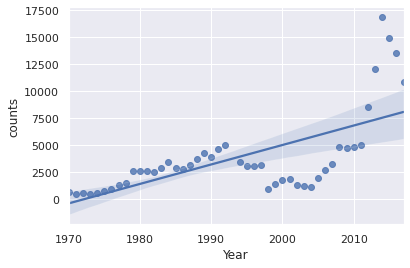

In [52]:
terrorism_per_year_df = terrorism_df["iyear"][terrorism_df["iyear"] > 1969].value_counts().sort_index().rename_axis('Year').reset_index(name='counts')
ax2 = sns.regplot(x="Year", y="counts", data=terrorism_per_year_df)


## As you can see, as movies increase so do recorded terrorist events. While the scope of this data is not sufficient to determine a causal effect we can say with some degree of confidence that they are correlated

Authors note: Correlation is not Causation and an expotential curve would have fit both of these datasets much better but we haven't really covered that and I haven't been able to get through it on my own either sadly. Also the wording above is deliberatly weasly.